In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sklearn
from sklearn.cluster import KMeans

(1200, 1920, 3)
(100, 160, 3)


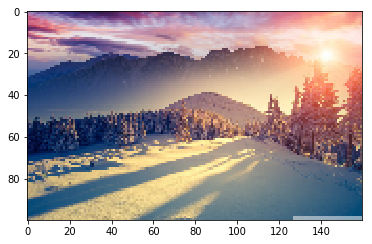

In [10]:
## Data
im = cv2.imread('/Users/suruchichopra/Desktop/Suransh/Github/Perceptron_2017_December/class_05/im.jpg')
print im.shape

r = im.shape[0]
c = im.shape[1]

new_r = 100
new_c = int( new_r* (float(c)/r) )

im = cv2.resize(im, (new_c,new_r))
print im.shape

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [11]:
## Data Generation
cols = im.shape[-1]
data = im.reshape( (-1,cols) )
print np.reshape?
print data.shape

(16000, 3)


In [ ]:
print np.reshape

In [12]:
print np.reshape

<function reshape at 0x112097140>


In [13]:
print np.reshape

<function reshape at 0x112097140>


In [14]:
## Clustering
km = KMeans(n_clusters=8)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
center_color = np.array( km.cluster_centers_,dtype = 'uint8' )
print center_color
print center_color.shape

[[194 164 180]
 [ 69  89 121]
 [235 196 146]
 [124 122 135]
 [186 144 129]
 [ 29  48  91]
 [244 221 194]
 [138  85  91]]
(8, 3)


In [16]:
freq = np.unique( km.labels_, return_counts= True )[1]
print freq
print freq.sum()
freq = freq/float(data.shape[0])
print freq

[1331 2446 2290 2525 2441 2050 1588 1329]
16000
[ 0.0831875  0.152875   0.143125   0.1578125  0.1525625  0.128125   0.09925
  0.0830625]


In [17]:
DOM = [ [freq[ix],center_color[ix]] for ix in range(km.n_clusters) ]
# for i in DOM:
#     print i
#     print "---------"
DOM = sorted( DOM,key= lambda r:r[0],reverse=True )
for i in DOM:
    print i
    print "---------"


[0.15781249999999999, array([124, 122, 135], dtype=uint8)]
---------
[0.15287500000000001, array([ 69,  89, 121], dtype=uint8)]
---------
[0.15256249999999999, array([186, 144, 129], dtype=uint8)]
---------
[0.143125, array([235, 196, 146], dtype=uint8)]
---------
[0.12812499999999999, array([29, 48, 91], dtype=uint8)]
---------
[0.099250000000000005, array([244, 221, 194], dtype=uint8)]
---------
[0.083187499999999998, array([194, 164, 180], dtype=uint8)]
---------
[0.083062499999999997, array([138,  85,  91], dtype=uint8)]
---------


TypeError: 'module' object is not callable

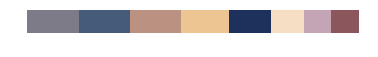

In [21]:
patch = np.ones( (40,600,3) )
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[ix][1]
    start = end
plt.axis('off')
plt.imshow(patch)
plt.show()